# Project to determine customers who can take up term deposit of the bank

#### Here we will try to predict the potential customers from the data that has been received by the  marketing campaign of the bank

The dataset contains following attributes

1.age(numeric)

2.job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3.marital: marital status (categorical: 'divorced','married','single','unknown';
 note: 'divorced' means divorced or widowed)

4.education(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5.default: has credit in default? (categorical: 'no','yes','unknown')

6.balance:average yearly balance, in euros (numeric)

7.housing: has housing loan? (categorical: 'no','yes','unknown')

8.loan: has personal loan? (categorical: 'no','yes','unknown')

9.contact:contact communication type (categorical: 'cellular','telephone')

10.day: last contact day of the month (numeric 1 -31)

11.month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

12.duration: last contact duration, in seconds (numeric). 
Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

13.campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14.pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15.previous: number of contacts performed before this campaign and for this client (numeric)

16.poutcome: outcome of the previous marketing campaign 
(categorical: 'failure','nonexistent','success')

17.Target:has the client subscribed a term deposit? (binary: "yes","no")



## Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

### Get the data

In [2]:
data=pd.read_csv('C:/Users/LENOVO/datascience/greatlearning/Project_ensembleTechnique/bank-full.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Explarotary Data Analysis

In [4]:
#Shape of data
data.shape

(45211, 17)

In [5]:
#Data type of attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#Summarize the presence of null value
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


In [7]:
#Describing the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


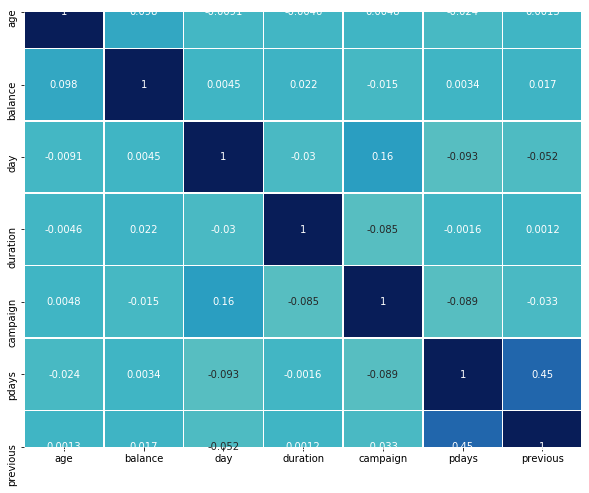

In [8]:
#Coreltion matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [9]:
#Selecting features for the model
data2=data[['age','balance','day','duration','campaign','pdays','previous']]

In [10]:
#Check for outlier
Q1=data2.quantile(0.25)
Q3=data2.quantile(0.75)
IQR=Q3-Q1
print("The first quartile Q1 is \n", Q1)
print("The third quartile Q3 is \n", Q1)
print("The IQR range is \n", IQR)

The first quartile Q1 is 
 age          33.0
balance      72.0
day           8.0
duration    103.0
campaign      1.0
pdays        -1.0
previous      0.0
Name: 0.25, dtype: float64
The third quartile Q3 is 
 age          33.0
balance      72.0
day           8.0
duration    103.0
campaign      1.0
pdays        -1.0
previous      0.0
Name: 0.25, dtype: float64
The IQR range is 
 age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [11]:
#Printing the outlier
outlier=((data2 <(Q1 - 1.5 * IQR))| (data2 > (Q3 + 1.5 * IQR))).sum()
print(outlier)

age          487
balance     4729
day            0
duration    3235
campaign    3064
pdays       8257
previous    8257
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F80EED2C08>]],
      dtype=object)

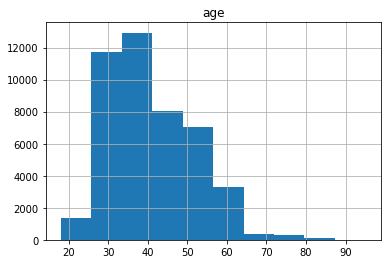

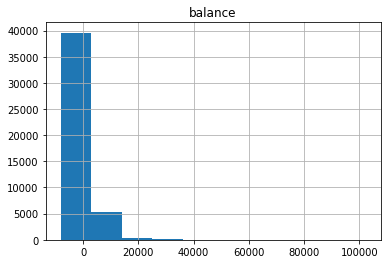

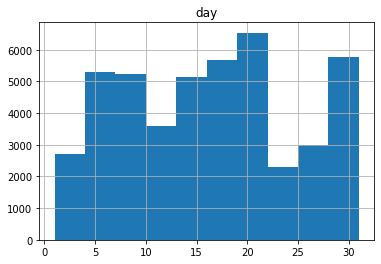

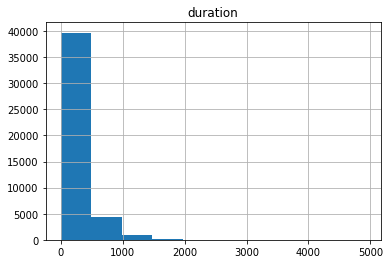

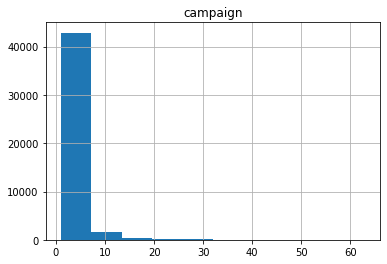

In [14]:
#Visualising the attribute spread
data2.hist(column='age')

data2.hist(column='balance')

data2.hist(column='day')

data2.hist(column='duration')
data2.hist(column='campaign')


In [15]:
#Distribution of target variable "Personal Loan"
n_yes = len(data.loc[data['Target'] == 'yes'])
n_no = len(data.loc[data['Target'] == 'no'])
print("Number of YES cases: {0} ({1:2.2f}%)".format(n_yes, (n_yes / (n_yes + n_no)) * 100 ))
print("Number of NO cases: {0} ({1:2.2f}%)".format(n_no, (n_no / (n_yes + n_no)) * 100))

Number of YES cases: 5289 (11.70%)
Number of NO cases: 39922 (88.30%)


In [16]:
#It is very unbalanced data so we need to balance

In [17]:
#Get rid of unwanted columns
data.loc[data['Target'] == 'yes']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [18]:
#Trimming attributes
data3=data[['age','default','balance','housing','duration','campaign','Target']]
#removed pdays as it had 9000 records with -1 value which is not meaningful

In [19]:
data.housing.unique() 

array(['yes', 'no'], dtype=object)

In [20]:
#Fetch charges data w.r.t yes and no customers wrt target variable

no_data=data3[data.Target=='no']
yes_data=data3[data.Target=='yes']

In [21]:
#creating a dataset with uniform distribution of target variable
yes_sample=yes_data.sample(n=5200,random_state=7)
no_sample=no_data.sample(n=7800,random_state=7)
total_sampled_data = pd.concat([yes_sample, no_sample], axis=0)

In [22]:
#Distribution of target variable "Personal Loan" in our new sampled dataset
yes_customer = len(total_sampled_data.loc[total_sampled_data['Target'] == 'yes'])
no_customer = len(total_sampled_data.loc[total_sampled_data['Target'] == 'no'])
print("Number of YES cases: {0} ({1:2.2f}%)".format(yes_customer, (yes_customer / (yes_customer + no_customer)) * 100 ))
print("Number of NO cases: {0} ({1:2.2f}%)".format(no_customer, (no_customer / (yes_customer + no_customer)) * 100))

Number of YES cases: 5200 (40.00%)
Number of NO cases: 7800 (60.00%)


In [23]:
total_sampled_data.head()

,age,default,balance,housing,duration,campaign,Target
44332,35,no,154,no,200,4,yes
36161,24,no,4500,yes,733,2,yes
43463,32,no,2016,no,232,1,yes
28710,36,no,98,no,771,1,yes
2474,23,no,4,yes,395,2,yes


In [24]:
#Check the attributes for any negative or improper values
total_sampled_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,13000.0,41.065692,11.603198,18.0,32.0,39.0,49.00,95.0
balance,13000.0,1480.876154,3241.772690,-8019.0,107.0,523.0,1636.25,102127.0
duration,13000.0,347.619462,335.800107,2.0,130.0,234.0,451.00,3881.0
campaign,13000.0,2.564769,2.815334,1.0,1.0,2.0,3.00,50.0


In [25]:
#We can see there are negative values for Balance variable which we will replace by zero
#CHeck customers having negative balance
len(total_sampled_data.loc[total_sampled_data['balance'] < 0])

910

In [26]:
#Impute those customers balance with zero for negative balance

In [27]:
num = total_sampled_data._get_numeric_data()

In [28]:
#Replacing negative numbers in balance variale with 0
num[num < 0] = 0

In [29]:
#check the attributes to confirm
total_sampled_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,13000.0,41.065692,11.603198,18.0,32.0,39.0,49.00,95.0
balance,13000.0,1503.681692,3228.278552,0.0,107.0,523.0,1636.25,102127.0
duration,13000.0,347.619462,335.800107,2.0,130.0,234.0,451.00,3881.0
campaign,13000.0,2.564769,2.815334,1.0,1.0,2.0,3.00,50.0


In [30]:
#We will proceed to label encode deafult,housing and target variable
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
encoded_data=total_sampled_data.apply(LabelEncoder().fit_transform)

In [31]:
encoded_data.head()

,age,default,balance,housing,duration,campaign,Target
44332,17,0,154,0,197,3,1
36161,6,0,2829,1,729,1,1
43463,14,0,1769,0,229,0,1
28710,18,0,98,0,766,0,1
2474,5,0,4,1,392,1,1


In [32]:
#Separating attributes and target variable component
X = encoded_data[[ 'age', 'default', 'balance','housing','duration','campaign']]
Y = encoded_data['Target']

In [33]:
#Splitting the data into training and test set in the ratio of 70:30 respectively
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
# 7 is just any random seed number

## Trying out different classification algorithms

## Logistic Regression

In [34]:
#Fitting Logistic Regressor
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
#Predict the test set with  logistic model
log_predict=logmodel.predict(x_test)

In [36]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,log_predict)
print(cm)
print("accuracy score of first model ",logmodel.score(x_test,y_test))

[[2011  329]
 [ 613  947]]
accuracy score of first model  0.7584615384615384


In [37]:
# print classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      2340
           1       0.74      0.61      0.67      1560

    accuracy                           0.76      3900
   macro avg       0.75      0.73      0.74      3900
weighted avg       0.76      0.76      0.75      3900



## KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5)
KNN_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
#predicting by KNN
y_pred_KNN = KNN_model.predict(x_test)

In [40]:
#Confusion matrix of knn model
cm_knn = confusion_matrix(y_test,y_pred_KNN)
print(cm_knn)
print("accuracy score of first knn model ",KNN_model.score(x_test,y_test))

[[1857  483]
 [ 617  943]]
accuracy score of first knn model  0.717948717948718


## Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()
naive_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
#predict results
y_pred_naive = naive_model.predict(x_test)

In [43]:
#confusion matrix for naive model

cm_naive = confusion_matrix(y_test, y_pred_naive)
print(cm_naive)

[[1767  573]
 [ 419 1141]]


In [44]:
#Printing accuracy
from sklearn import metrics
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_pred_naive)))

Model Accuracy: 0.7456


## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(x_train, y_train )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [46]:
#Score of our decision tree
print(dt_model.score(x_train, y_train))
print(dt_model.score(x_test, y_test))

0.9998901098901098
0.7076923076923077


## Ensemble -Bagging

In [47]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

0.7617948717948718


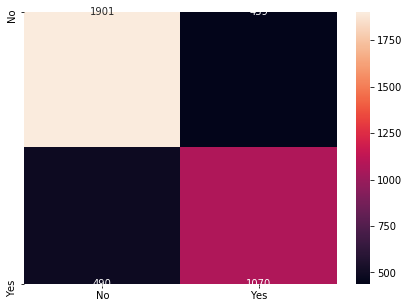

In [48]:
y_predict_bg = bgcl.predict(x_test)

print(bgcl.score(x_test , y_test))

cm_bg=metrics.confusion_matrix(y_test, y_predict_bg,labels=[0, 1])

df_cm = pd.DataFrame(cm_bg, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

 ## Ensemble Learning - AdaBoosting

In [49]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)

0.767948717948718


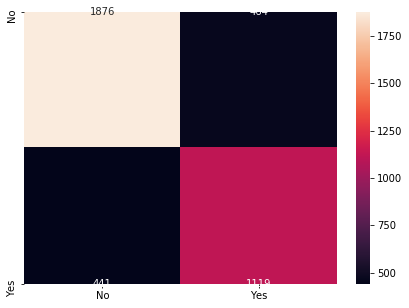

In [50]:
y_predict_ab = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

cm_ab=metrics.confusion_matrix(y_test, y_predict_ab,labels=[0, 1])

df_cm_ab = pd.DataFrame(cm_ab, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_ab, annot=True ,fmt='g')

## Ensemble Gradient boost

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

0.7835897435897435


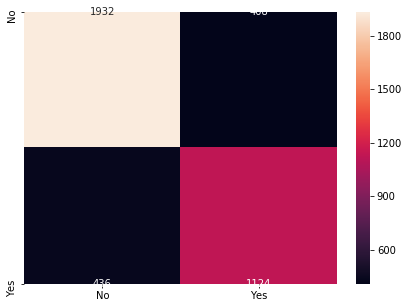

In [52]:
y_predict_gb = gbcl.predict(x_test)
print(gbcl.score(x_test, y_test))
cm_gb=metrics.confusion_matrix(y_test, y_predict_gb,labels=[0, 1])

df_cm_gb = pd.DataFrame(cm_gb, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_gb, annot=True ,fmt='g')

## Ensemble Random forest classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=4)
rfcl = rfcl.fit(x_train, y_train)

0.7605128205128205


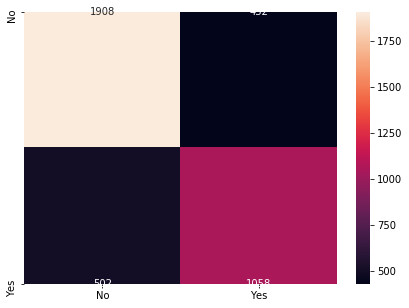

In [54]:
y_predict_rf = rfcl.predict(x_test)
print(rfcl.score(x_test, y_test))
cm_rf=metrics.confusion_matrix(y_test, y_predict_rf,labels=[0, 1])

df_cm_rf = pd.DataFrame(cm_rf, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm_rf, annot=True ,fmt='g')

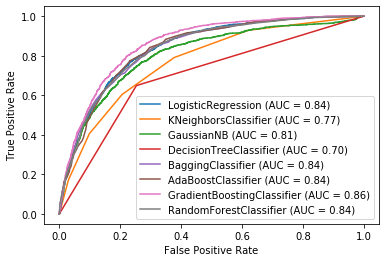

In [55]:
#ROC curve for all models
import nltk
import sklearn
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(logmodel,x_test,y_test)
knn_plot=plot_roc_curve(KNN_model,x_test,y_test,ax=disp.ax_)
naive_plot=plot_roc_curve(naive_model,x_test,y_test,ax=disp.ax_)
dt_plot=plot_roc_curve(dt_model,x_test,y_test,ax=disp.ax_)
bagging_plot=plot_roc_curve(bgcl,x_test,y_test,ax=disp.ax_)
adaboosting_plot=plot_roc_curve(abcl,x_test,y_test,ax=disp.ax_)
gradboosting_plot=plot_roc_curve(gbcl,x_test,y_test,ax=disp.ax_)
randforest_plot=plot_roc_curve(rfcl,x_test,y_test,ax=disp.ax_)

## By the above comparison we can see that Gradient Boosting Classifier has the best accuracy, hence we will choose it as our final model
